## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
#mouse_metadata.head()
#study_results.head()

dataset = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID"])
dataset.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Mean
print(f"The mean of each drug is:")
mean = dataset.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
print(mean.head())
print()

# Median
print(f"The median of each drug is:")
median = dataset.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
print(median.head())
print()

# Variance
print(f"The variance of each drug is:")
median = dataset.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
print(median.head())
print()

# Standard Deviation
print(f"The standard deviation of each drug is:")
median = dataset.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
print(median.head())
print()

# SEM
print(f"The SEM of each drug is:")
median = dataset.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
print(median.head())
print()

## Bar plots

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_counts = dataset["Drug Regimen"].value_counts()
regimen_counts.plot(kind = "bar", x = "Drug Regimen", y = "Drug Use Count")

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_counts = dataset["Drug Regimen"].value_counts()
regimen_counts.plot.bar(x="Drug Regimen", y = "Drug Use Count")

## Pie plots

In [ ]:
# Group & count by sex
mouseID = dataset.groupby(["Sex"]).count()
mouseID_count = mouseID["Mouse ID"]
mouseID_count

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseID_count.plot.pie(autopct="% .2f")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dataset.Sex.value_counts().plot(kind='pie', autopct="% .2f")
plt.axis('equal')
plt.title('Male vs. Female Mice')

## Quartiles, outliers and boxplots

In [119]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Get needed values
mouse_group = dataset.groupby(["Mouse ID"]).max()
tumors_group = mouse_group.reset_index()
tumor_max_data = tumors_group[["Mouse ID","Timepoint"]].merge(dataset, how = "left", on = ["Mouse ID","Timepoint"])
# Sort by drug regimen
capomulin = tumor_max_data.loc[tumor_max_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = tumor_max_data.loc[tumor_max_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = tumor_max_data.loc[tumor_max_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = tumor_max_data.loc[tumor_max_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

In [88]:
# capomulin
capomulin_q1 = capomulin.quantile(0.25)
capomulin_q3 = capomulin.quantile(0.75)
capomulin_iqr = capomulin_q3 - capomulin_q1

# ramicane
ramicane_q1 = ramicane.quantile(0.25)
ramicane_q3 = ramicane.quantile(0.75)
ramicane_iqr = ramicane_q3 - ramicane_q1

# infubinol
infubinol_q1 = infubinol.quantile(0.25)
infubinol_q3 = infubinol.quantile(0.75)
infubinol_iqr = infubinol_q3 - infubinol_q1

# ceftamin
ceftamin_q1 = ceftamin.quantile(0.25)
ceftamin_q3 = ceftamin.quantile(0.75)
ceftamin_iqr = ceftamin_q3 - ceftamin_q1

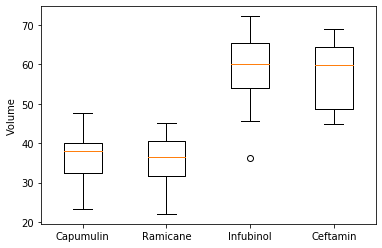

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = ["Capumulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Volume")
plt.show()

## Line and scatter plots

In [136]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = dataset.loc[dataset["Drug Regimen"] == "capomulin"]
#capomulin
mouses_data = capomulin.loc[capomulin["Mouse ID"] == s185]
plt.plot(mouses_data["Timepoint"], mouses_data["Tumor Volume (mm3)"])
plt.show()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


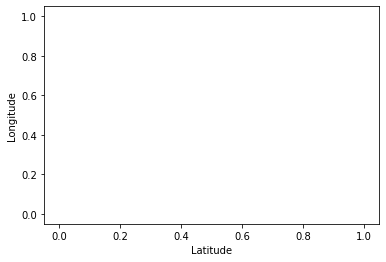

In [129]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_data = dataset.loc[dataset["Drug Regimen"] == "capomulin"]
capomulin_avg = mouse_data.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
